#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [80]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [81]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Task 1 : Basic Data Exploration



In [82]:
df.shape

(148654, 13)

* number of rows = 40409 row
* number of columns = 13 column

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


* this data types of each column  
* Id                => int64  
* EmployeeName      => object
* JobTitle          =>  object
* BasePay           =>  float64
* OvertimePay       =>  float64
* OtherPay          =>  float64
* Benefits          =>  float64
* TotalPay          =>  float64
* TotalPayBenefits  =>  float64
* Year              =>  float64
* Notes             =>  float64
* Agency            =>  object
* Status            =>  float64

In [84]:
col_has_null = []
for col in df.columns:
 if df[col].isna().sum() > 0 :
  col_has_null.append(col)

print(col_has_null)

['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'Notes', 'Status']


**This columns have null value :**
* BasePay
* OvertimePay
* OtherPay
* Benefits
* TotalPay
* TotalPayBenefits
* Year
* Notes
* Agency
* Status







# Task 2 : Descriptive Statistics

In [85]:

print('Salary value mostfreqency ' , df['TotalPay'].mode())
df['TotalPay'].describe()

Salary value mostfreqency  0    0.0
Name: TotalPay, dtype: float64


count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

* mean = 132399.871817
* median =  124674.770000
* mode = 123290.7
* minimum = 98061.210000
* maximum salary = 567595.430000
* range of salaries = min to max = 98061.210000 to  567595.43
* standard deviation =  29090.502655


# Task 3 : Data Cleaning

In [86]:
col_has_null.remove('Notes')
col_has_null.remove('Status')

In [87]:

df.drop( ['Notes' ,'Status'] , axis=1 ,inplace=True)
df['Year'] = df['Year'].astype('object' )

for col in col_has_null :
   if df[col].dtype == 'float64':
     df[col].fillna(df[col].median() , inplace= True)
   elif  df[col].dtype == 'object':
     df[col].fillna(df[col].mode() , inplace= True)


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  object 
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 12.5+ MB




1.  removed columns Notes and Status from data because they do not have any data
2. convert type of Year column from float to string to optain the mode of column
3. in nomeric columns fill null values with the median value of column
4. in string columns fill null values wiht the mode value of column


# Task 4 : Basic Data Visualization

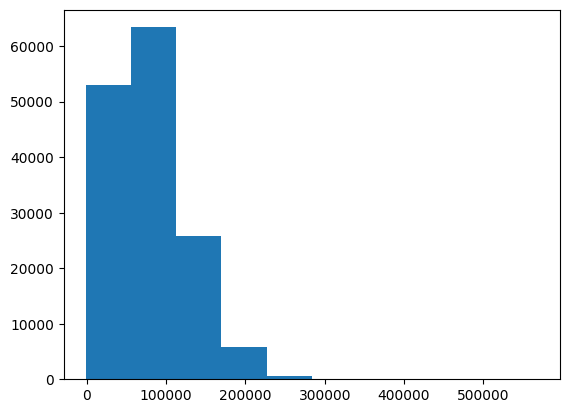

In [89]:

import matplotlib.pyplot as plt

plt.hist(df['TotalPay'] )
plt.show()

In [91]:
df['Agency'].value_counts()

San Francisco    148654
Name: Agency, dtype: int64

In [92]:
df['Agency'].value_counts().to_frame().index

Index(['San Francisco'], dtype='object')

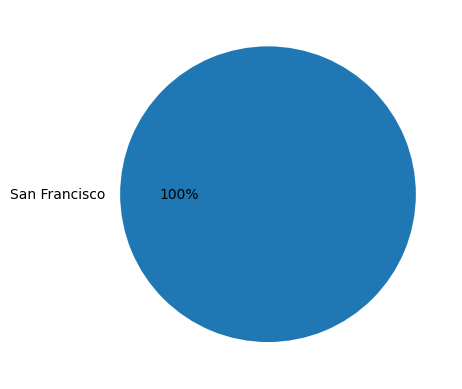

In [93]:
plt.pie(df['Agency'].value_counts(),labels= df['Agency'].value_counts().to_frame().index ,autopct='%1.0f%%')
plt.show()


* All of employees work in San Francisco department

# Task 5 : Grouped Analysis

In [98]:
df.pivot_table(values= 'TotalPay' ,
               index= 'Year' ,
               aggfunc= ['mean','median' ,'std'] ,

               )

,mean,median,std
,TotalPay,TotalPay,TotalPay
Year,,,
2011,71744.103871,68213.240,47498.706594
2012,74113.262265,70714.680,49523.904319
2013,77611.443142,74500.015,52854.774783
2014,75463.918140,72359.980,51697.713029


# Task 6 : Simple Correlation Analysis

In [103]:
correlation = df['TotalPay'].corr(df['Benefits'])

print(f"Correlation between salary and TotalPayBenefits: {correlation}")


Correlation between salary and TotalPayBenefits: 0.7735587786803056


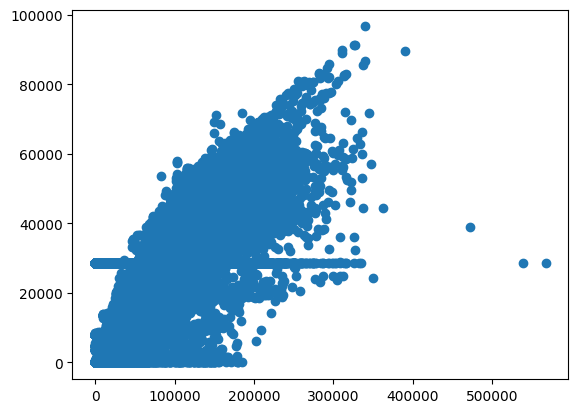

In [102]:
plt.scatter(df['TotalPay'],df['Benefits'])

* Correlation between salary and TotalPayBenefits: 0.7735587786803056

# Task 7 : Report

In [104]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [110]:
df['JobTitle'].value_counts()

Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: JobTitle, Length: 2159, dtype: int64

In [ ]:
df['BasePay'].min()
# 319275.01 -166.01

In [124]:
print(df['OvertimePay'].max() , df['OvertimePay'].min())

245131.88 -0.01


In [135]:
list_yesrs = df['Year'].value_counts().to_frame().index
for i in list_yesrs :
  print('in ',i , 'the most benfit is ' ,df[df['Year'] == i]['Benefits'].max())


in  2014 the most benfit is  96570.66
in  2013 the most benfit is  86533.21
in  2012 the most benfit is  84681.82
in  2011 the most benfit is  28628.62


In [138]:
df['Agency'].value_counts()

San Francisco    148654
Name: Agency, dtype: int64

**Insights**
* The most 5 of job title :
  1. Transit Operator                
  2. Special Nurse                  
  3. Registered Nurse                
  4. Public Svc Aide-Public Works    
  5. Police Officer 3                 

* the least 5 of job title :
  1. CHIEF HOUSING INSPECTOR                              
  2. TRAFFIC SIGNAL OPERATOR                               
  3. COURT COMPUTER FACILITIES COORDINATOR                
  4. AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       
  5. VICTIM & WITNESS TECHNICIAN                  


* The maximum value of the basic payment is : 319275.01        
* The minimum value of the basic payment is : -166.01

* The maximum value of the Overtime Pay is : 245131.88        
* The minimum value of theOvertime Pay is :  -0.01  

* in  2014 the most benfit is  96570.66
* in  2013 the most benfit is  86533.21
* in  2012 the most benfit is  84681.82
* in  2011 the most benfit is  28628.62


* All of employees works in San Francisco department
   



# Good Luck!